In [9]:
import pandas as pd
# import numpy as np

# Datos ficticios de ventas
data_ventas_advanced = {
    'Fecha': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', 
              '2023-01-06', '2023-01-07', '2023-02-01', '2023-02-02', '2023-02-03'],
    'Cliente': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Edad': [23, 45, 35, 28, 40, 50, 33, 24, 36, 29],
    'Género': ['F', 'M', 'M', 'F', 'M', 'F', 'M', 'F', 'F', 'M'],
    'Canal': ['Online', 'Offline', 'Online', 'Offline', 'Online', 'Offline', 'Online', 'Offline', 'Online', 'Offline'],
    'Producto': ['Camiseta', 'Zapatos', 'Pantalón', 'Camiseta', 'Zapatos', 
                 'Camiseta', 'Pantalón', 'Camiseta', 'Zapatos', 'Pantalón'],
    'Categoría': ['Ropa', 'Calzado', 'Ropa', 'Ropa', 'Calzado', 
                   'Ropa', 'Pantalón', 'Ropa', 'Zapatos', 'Ropa'],
    'Cantidad': [1, 2, 1, 3, 1, 2, 1, 2, 3, 1],
    'Precio': [25, 50, 75, 25, 50, 75, 25, 50, 75, 25],
    'Ventas Totales': [25, 100, 75, 75, 50, 150, 100, 50, 150, 75],
    'Región': ['Norte', 'Sur', 'Este', 'Oeste', 'Norte', 'Sur', 'Este', 'Oeste', 'Norte', 'Sur'],
    # Columna de tipo de cliente agregada
    'Tipo de Cliente': ['Nuevo', 'Recurrente', 'Nuevo', 'Recurrente', 'Nuevo', 
                        'Recurrente', 'Nuevo', 'Recurrente', 'Nuevo', 'Recurrente']
}

# Crear el DataFrame
df_advanced = pd.DataFrame(data_ventas_advanced)
df_advanced

,Fecha,Cliente,Edad,Género,Canal,Producto,Categoría,Cantidad,Precio,Ventas Totales,Región,Tipo de Cliente
0,2023-01-01,A,23,F,Online,Camiseta,Ropa,1,25,25,Norte,Nuevo
1,2023-01-02,B,45,M,Offline,Zapatos,Calzado,2,50,100,Sur,Recurrente
2,2023-01-03,C,35,M,Online,Pantalón,Ropa,1,75,75,Este,Nuevo
3,2023-01-04,D,28,F,Offline,Camiseta,Ropa,3,25,75,Oeste,Recurrente
4,2023-01-05,E,40,M,Online,Zapatos,Calzado,1,50,50,Norte,Nuevo
5,2023-01-06,F,50,F,Offline,Camiseta,Ropa,2,75,150,Sur,Recurrente
6,2023-01-07,G,33,M,Online,Pantalón,Pantalón,1,25,100,Este,Nuevo
7,2023-02-01,H,24,F,Offline,Camiseta,Ropa,2,50,50,Oeste,Recurrente
8,2023-02-02,I,36,F,Online,Zapatos,Zapatos,3,75,150,Norte,Nuevo
9,2023-02-03,J,29,M,Offline,Pantalón,Ropa,1,25,75,Sur,Recurrente


In [ ]:
df_advanced['Categoría'] = df_advanced['Categoría'].replace('Zapatos', 'Calzado')
df_advanced = df_advanced.dropna()
# df_advanced['Categoría', 'Producto', 'Canal', 'Región', 'Tipo de Cliente'] = df_advanced['Categoría', 'Producto', 'Canal', 'Región', 'Tipo de Cliente'].str.strip()
df_advanced = df_advanced.drop_duplicates()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14016\3091934748.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


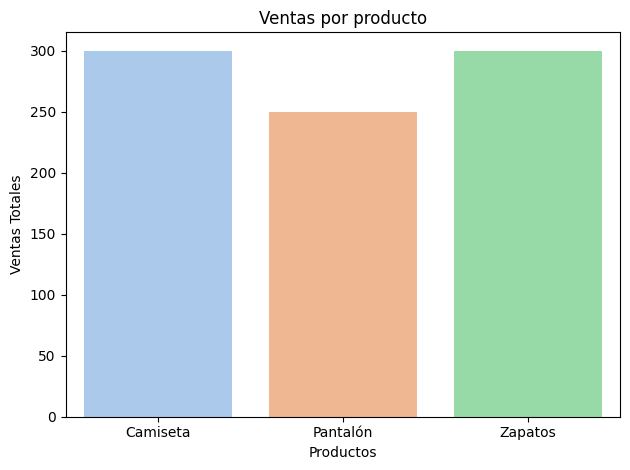

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

venta_productos = df_advanced.groupby('Producto')['Ventas Totales'].agg('sum').reset_index()

sns.barplot(
    data=venta_productos,
    x='Producto',
    y='Ventas Totales',
    palette='pastel'
)

plt.title('Ventas por producto')
plt.xlabel('Productos')
plt.ylabel('Ventas Totales')
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14016\1315223676.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


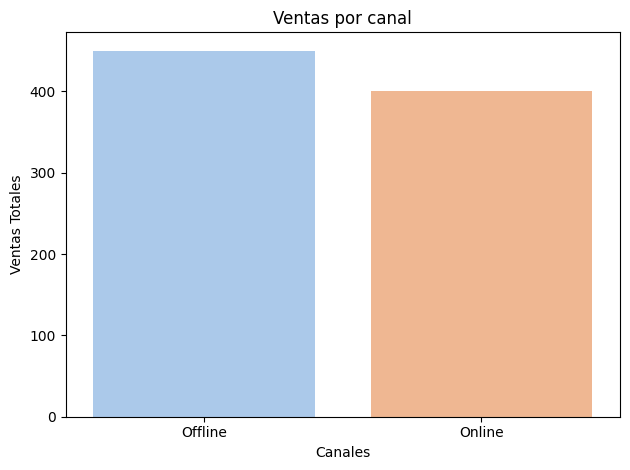

In [23]:
ventas_canal = df_advanced.groupby('Canal')['Ventas Totales'].agg('sum').reset_index()

sns.barplot(
    data=ventas_canal,
    x='Canal',
    y='Ventas Totales',
    palette='pastel'
)

plt.title('Ventas por canal')
plt.xlabel('Canales')
plt.ylabel('Ventas Totales')
plt.tight_layout()
plt.show()

In [24]:
ventas_por_cliente_genero = df_advanced.groupby(['Tipo de Cliente', 'Género'])['Ventas Totales'].sum().reset_index()
ventas_por_cliente_genero

,Tipo de Cliente,Género,Ventas Totales
0,Nuevo,F,175
1,Nuevo,M,225
2,Recurrente,F,275
3,Recurrente,M,175


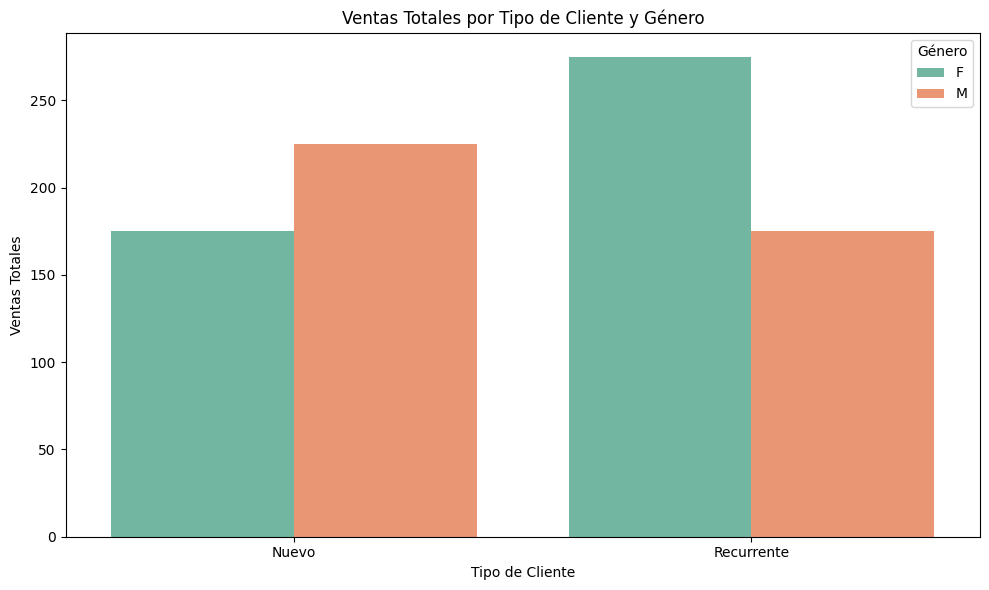

In [26]:
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.barplot(data=ventas_por_cliente_genero, 
            x='Tipo de Cliente', 
            y='Ventas Totales', 
            hue='Género',  # Se agrupa por género
            palette='Set2')  # Paleta de colores

# Personalizar el gráfico
plt.title('Ventas Totales por Tipo de Cliente y Género')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Ventas Totales')
plt.tight_layout()  # Ajuste de márgenes
plt.legend(title='Género')

# Mostrar el gráfico
plt.show()

In [32]:
# Correlación entre Ventas Totales, Edad, Canal, Género, y Cantidad.
df_advanced['Canal_num'] = df_advanced['Canal'].map({'Online': 1, 'Offline': 0})
df_advanced['Género_num'] = df_advanced['Género'].map({'F': 0, 'M':1})
correlacion_df = df_advanced[['Ventas Totales', 'Edad', 'Canal_num', 'Género_num', 'Cantidad']]
correlacion = correlacion_df.corr()
# correlacion_df
correlacion

,Ventas Totales,Edad,Canal_num,Género_num,Cantidad
Ventas Totales,1.000000,0.679420,-0.128037,-0.128037,0.508197
Edad,0.679420,1.000000,-0.107563,0.250980,0.105585
Canal_num,-0.128037,-0.107563,1.000000,0.200000,-0.384111
Género_num,-0.128037,0.250980,0.200000,1.000000,-0.640184
Cantidad,0.508197,0.105585,-0.384111,-0.640184,1.000000
